# AMAZON STOCK PRICE PREDICTION USING ML(MACHINE LEARNING) PROJECT

## IMPORT ALL THE LIBRARY IS NEEDED

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.graph_objects as go

## GATHER THE DATASET TO THE GITHUB

In [85]:
amazon = pd.read_csv(r"C:\Users\PRAVEEN KUMAR\Desktop\MY PROJECT\AMAZON.csv")

In [86]:
print(amazon)

            Date        Open        High         Low       Close   Adj Close  \
0     1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1     1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2     1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3     1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4     1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...          ...         ...         ...         ...         ...         ...   
6511  2023-03-30  101.550003  103.040001  101.010002  102.000000  102.000000   
6512  2023-03-31  102.160004  103.489998  101.949997  103.290001  103.290001   
6513  2023-04-03  102.300003  103.290001  101.430000  102.410004  102.410004   
6514  2023-04-04  102.750000  104.199997  102.110001  103.949997  103.949997   
6515  2023-04-05  103.910004  103.910004  100.750000  101.099998  101.099998   

          Volume  
0     1443120000  
1

### FIND THE MISSING VALUE IF IS PRESENT

In [87]:
amazon.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### INFORMATION ABOUT THE DATASET

In [88]:
print(amazon.shape)

(6516, 7)


### Check the duplicate data is present or not

In [89]:
amazon.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6511    False
6512    False
6513    False
6514    False
6515    False
Length: 6516, dtype: bool

### Collect the information about the data

In [90]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


### Describe the data

In [91]:
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6.516000e+03
mean,31.611626,31.991995,31.193432,31.599740,31.599740,1.425338e+08
std,48.095343,48.659651,47.464476,48.060258,48.060258,1.401619e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,1.998875,2.028500,1.964750,2.001250,2.001250,6.888182e+07
50%,6.456750,6.535500,6.353250,6.444250,6.444250,1.059050e+08
75%,38.451375,38.688000,38.203001,38.464625,38.464625,1.607700e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


## EXTRACT THE DATE INTO MONTH,DAY AND YEAR

In [92]:
print(amazon['Date'])

0       1997-05-15
1       1997-05-16
2       1997-05-19
3       1997-05-20
4       1997-05-21
           ...    
6511    2023-03-30
6512    2023-03-31
6513    2023-04-03
6514    2023-04-04
6515    2023-04-05
Name: Date, Length: 6516, dtype: object


In [93]:
invalid_dates= amazon[amazon['Date'].isna()]
print(invalid_dates)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [94]:
amazon['Date'] = pd.to_datetime(amazon['Date'],dayfirst='true')
amazon['year'] = amazon['Date'].dt.year
amazon['month'] = amazon['Date'].dt.month
amazon['day'] = amazon['Date'].dt.day
print(amazon)

           Date        Open        High         Low       Close   Adj Close  \
0    1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1    1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2    1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3    1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4    1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...         ...         ...         ...         ...         ...         ...   
6511 2023-03-30  101.550003  103.040001  101.010002  102.000000  102.000000   
6512 2023-03-31  102.160004  103.489998  101.949997  103.290001  103.290001   
6513 2023-04-03  102.300003  103.290001  101.430000  102.410004  102.410004   
6514 2023-04-04  102.750000  104.199997  102.110001  103.949997  103.949997   
6515 2023-04-05  103.910004  103.910004  100.750000  101.099998  101.099998   

          Volume  year  month  day  
0     14431200

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_6468\3091077907.py:1: UserWarning:

Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



### REMOVE THE ADJ CLOSE COLUMN

In [95]:
amazon = amazon.drop(['Adj Close'], axis=1)
print(amazon)

           Date        Open        High         Low       Close      Volume  \
0    1997-05-15    0.121875    0.125000    0.096354    0.097917  1443120000   
1    1997-05-16    0.098438    0.098958    0.085417    0.086458   294000000   
2    1997-05-19    0.088021    0.088542    0.081250    0.085417   122136000   
3    1997-05-20    0.086458    0.087500    0.081771    0.081771   109344000   
4    1997-05-21    0.081771    0.082292    0.068750    0.071354   377064000   
...         ...         ...         ...         ...         ...         ...   
6511 2023-03-30  101.550003  103.040001  101.010002  102.000000    53633400   
6512 2023-03-31  102.160004  103.489998  101.949997  103.290001    56704300   
6513 2023-04-03  102.300003  103.290001  101.430000  102.410004    41135700   
6514 2023-04-04  102.750000  104.199997  102.110001  103.949997    48662500   
6515 2023-04-05  103.910004  103.910004  100.750000  101.099998    45103000   

      year  month  day  
0     1997      5   15  
1

### Check the datatype of the data 

In [96]:
amazon.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
year               int32
month              int32
day                int32
dtype: object

fg = go.figure(data = [plt.candlestick(x=amazon['Date'],
                                                 open=amazon['Open'],
                                                 High=amazon['High'],
                                                 Low=amazon['Low'],
                                                 Close=amazon['Close'])])

## VISUALIZATION OF THE DATASET

### DATA VISUALIZE WITH LINEPLOT

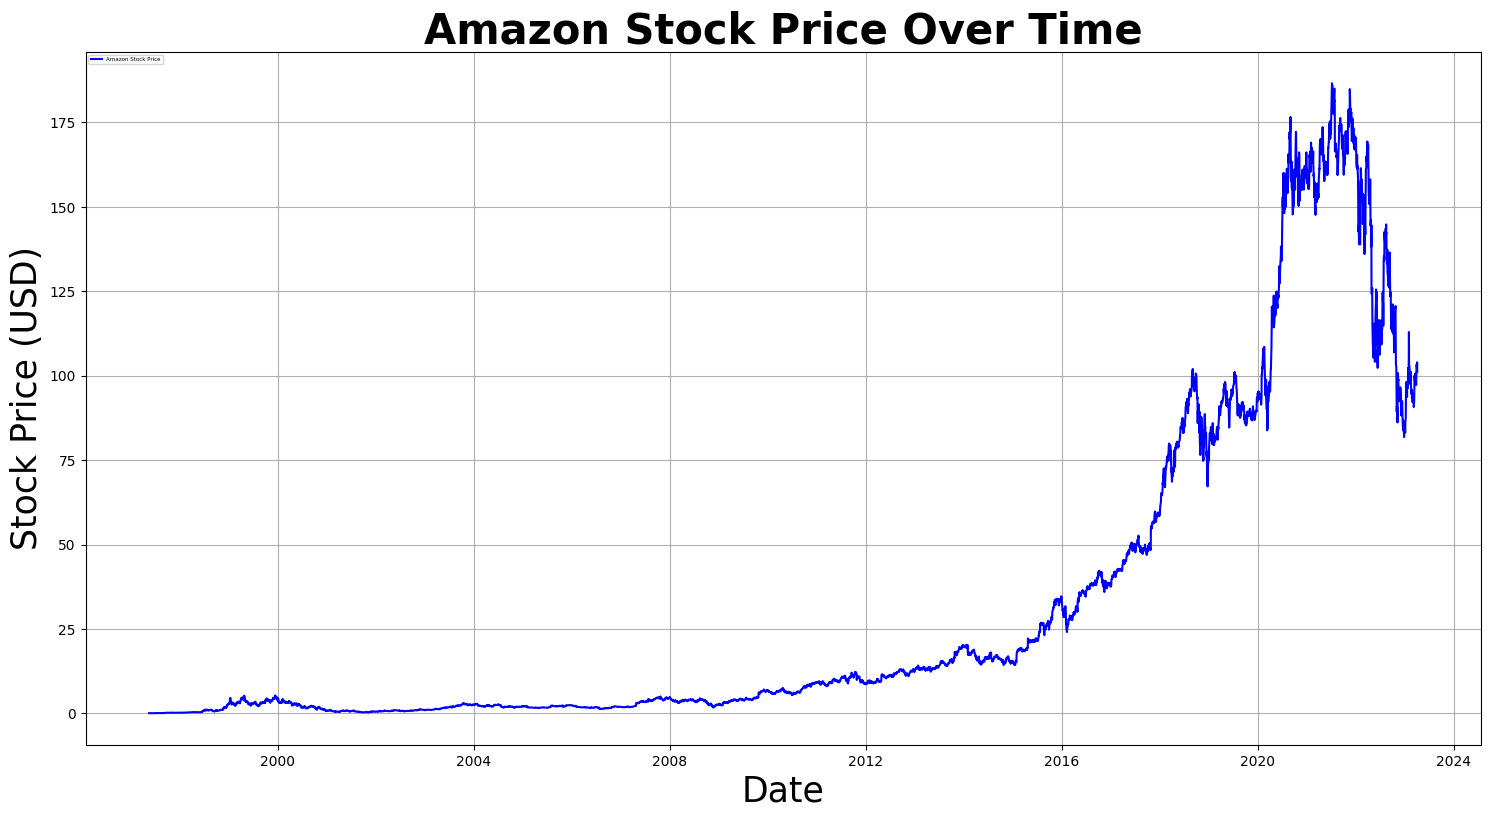

In [97]:
# Plot the closing prices over time
plt.figure(figsize=(18, 9))
plt.plot(amazon['Date'], amazon['Close'], label='Amazon Stock Price', color='blue')
plt.title('Amazon Stock Price Over Time',  fontsize=30, fontweight='bold')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Stock Price (USD)', fontsize=25)
plt.legend(loc='upper left', fontsize=4)



plt.grid(True)
plt.show()

### Visualize the correlation and coefficient the data

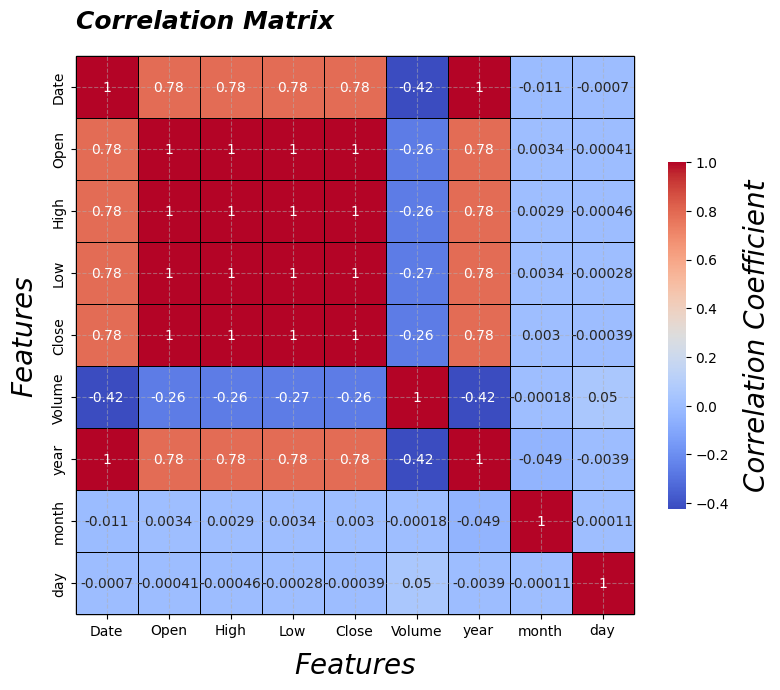

In [98]:
fig, ax = plt.subplots(figsize=(9, 9))

# create the heatmap
sns.heatmap(amazon.corr(), annot=True, cmap='coolwarm', square=True, ax=ax, 
            linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.5})

# set title and labels
ax.set_title('Correlation Matrix', fontsize=18, fontweight='bold', fontstyle='italic', 
             pad=20, loc='left')
ax.set_xlabel('Features', fontsize=20, fontstyle='italic', labelpad=10)
ax.set_ylabel('Features', fontsize=20, fontstyle='italic', labelpad=10)

# add grid
ax.grid(True, linestyle='--', alpha=0.5, which='both', zorder=0)

# customize the colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coefficient', fontsize=20, fontstyle='italic', labelpad=10)
cbar.ax.tick_params(labelsize=10)

# add a border around the heatmap
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)

# show the plot
plt.show()

### Dataset visualize with using pairplot

In [99]:
Amazon = amazon.drop(['month','day','Volume'], axis=1)
print(Amazon)

           Date        Open        High         Low       Close  year
0    1997-05-15    0.121875    0.125000    0.096354    0.097917  1997
1    1997-05-16    0.098438    0.098958    0.085417    0.086458  1997
2    1997-05-19    0.088021    0.088542    0.081250    0.085417  1997
3    1997-05-20    0.086458    0.087500    0.081771    0.081771  1997
4    1997-05-21    0.081771    0.082292    0.068750    0.071354  1997
...         ...         ...         ...         ...         ...   ...
6511 2023-03-30  101.550003  103.040001  101.010002  102.000000  2023
6512 2023-03-31  102.160004  103.489998  101.949997  103.290001  2023
6513 2023-04-03  102.300003  103.290001  101.430000  102.410004  2023
6514 2023-04-04  102.750000  104.199997  102.110001  103.949997  2023
6515 2023-04-05  103.910004  103.910004  100.750000  101.099998  2023

[6516 rows x 6 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

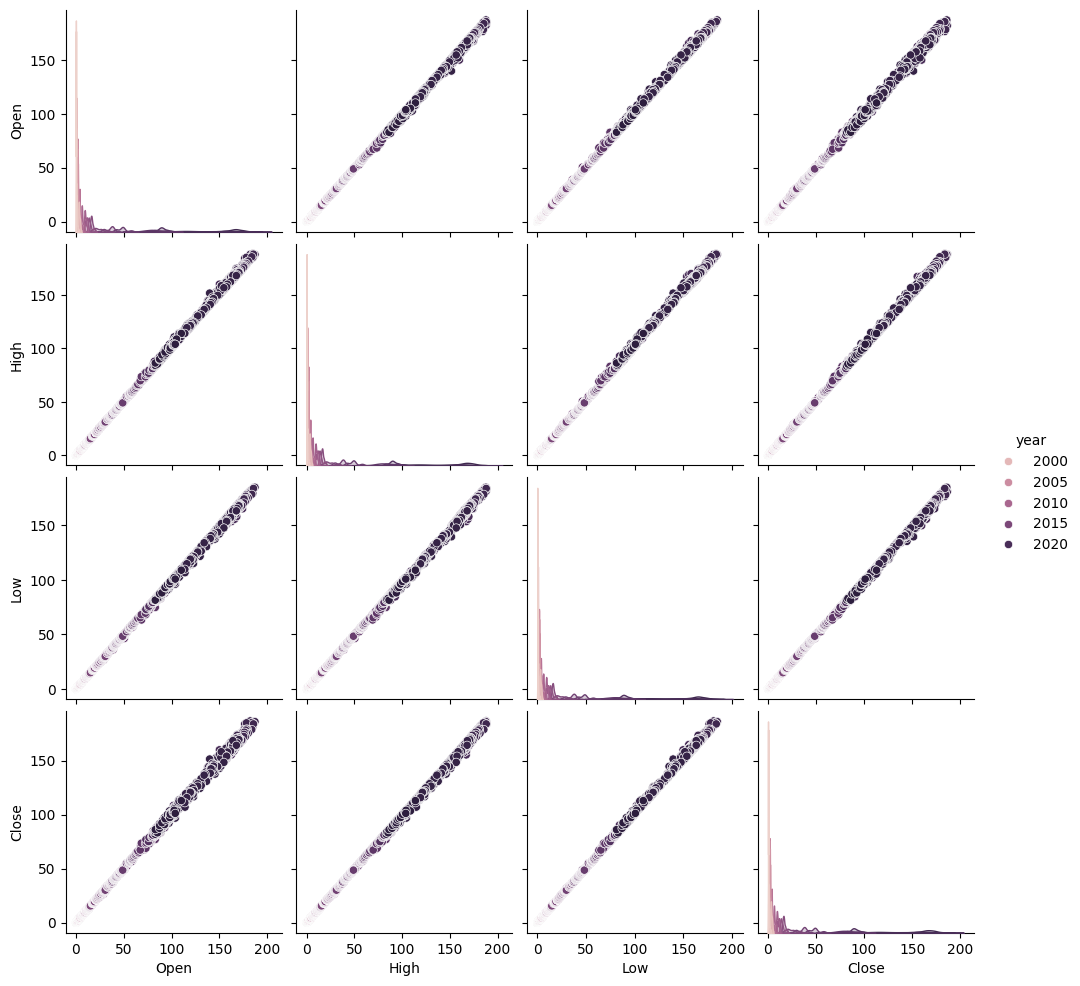

In [100]:
sns.pairplot(Amazon,hue='year')
plt.show

## Calculate moving averages

In [101]:
# Calculate moving averages
amazon['MA50'] = amazon['Close'].rolling(window=50).mean()
amazon['MA200'] = amazon['Close'].rolling(window=200).mean()

### Visualize the Calculate moving averages using line plot

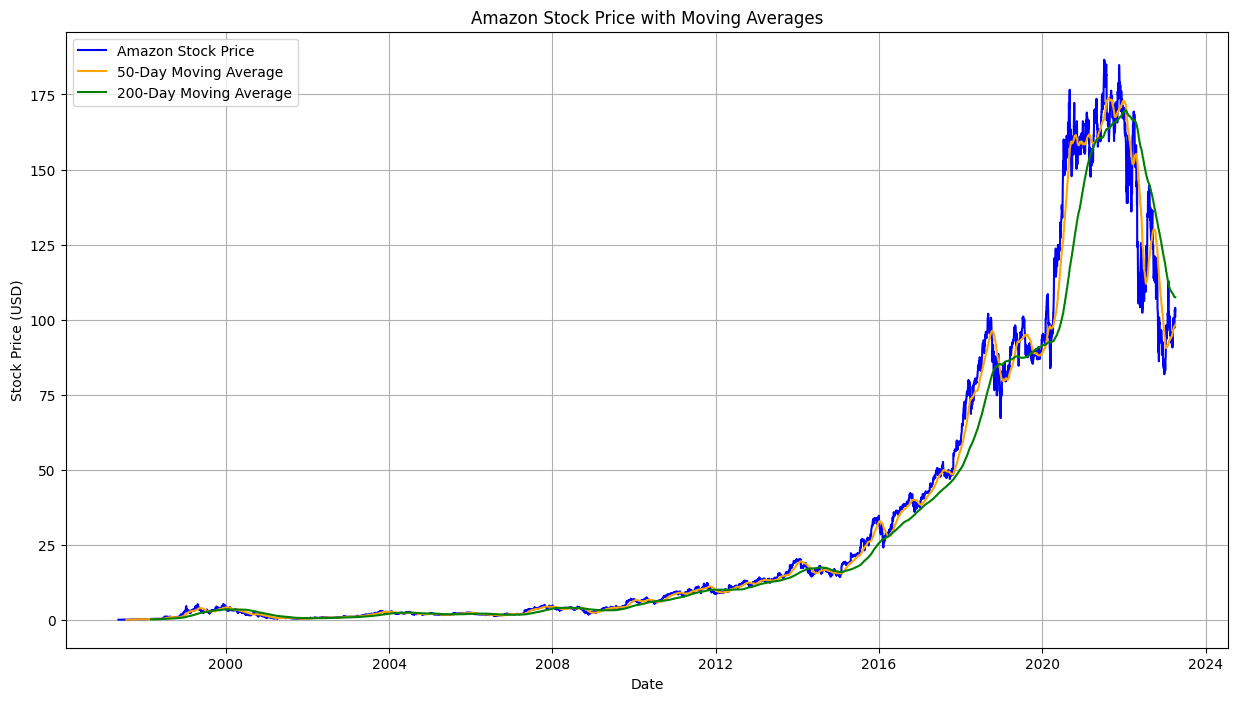

In [102]:
# Plot the stock prices and moving averages
plt.figure(figsize=(15, 8))
plt.plot(amazon['Date'], amazon['Close'], label='Amazon Stock Price', color='blue')
plt.plot(amazon['Date'], amazon['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(amazon['Date'], amazon['MA200'], label='200-Day Moving Average', color='green')
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Visualize the complete dataset using the candlestick chart

In [103]:
# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=amazon['Date'],
                                    open=amazon['Open'],
                                    high=amazon['High'],
                                    low=amazon['Low'],
                                    close=amazon['Close'],
                                    name='Candlestick')])

fig.update_layout(title='Amazon Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

### Visualize the how much given stock daily returns using histograph

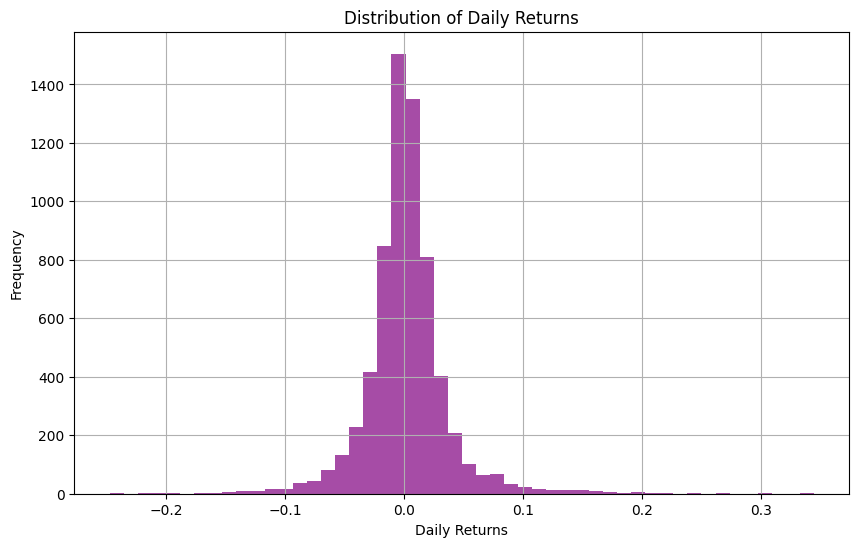

In [104]:
amazon['Return'] = amazon['Close'].pct_change()

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(amazon['Return'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [105]:
# Use 'Close' price for prediction
data = amazon[['Date', 'Close']]

In [106]:
# Set Date as the index
data.set_index('Date', inplace=True)

In [107]:
# Normalize the stock price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

In [108]:
# Create training and test sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [109]:
# Convert data into X (input) and y (target)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [110]:
# Prepare training and testing datasets
time_step = 60  # 60 previous days to predict the next day
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [111]:
# Reshape the input to be 3D for LSTM [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [112]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [113]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [114]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.7138e-05 - val_loss: 0.0011
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 8.0450e-05 - val_loss: 0.0015
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 7.3952e-05 - val_loss: 0.0033
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 6.5868e-05 - val_loss: 0.0018
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.6301e-05 - val_loss: 0.0014
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 6.5145e-05 - val_loss: 8.8352e-04
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 5.5804e-05 - val_loss: 0.0037
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 5.5937e-05 - val_loss: 0.0015
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.2114e-05 - val_loss: 9.2531e-04


### Visualize the Plot training and validation loss

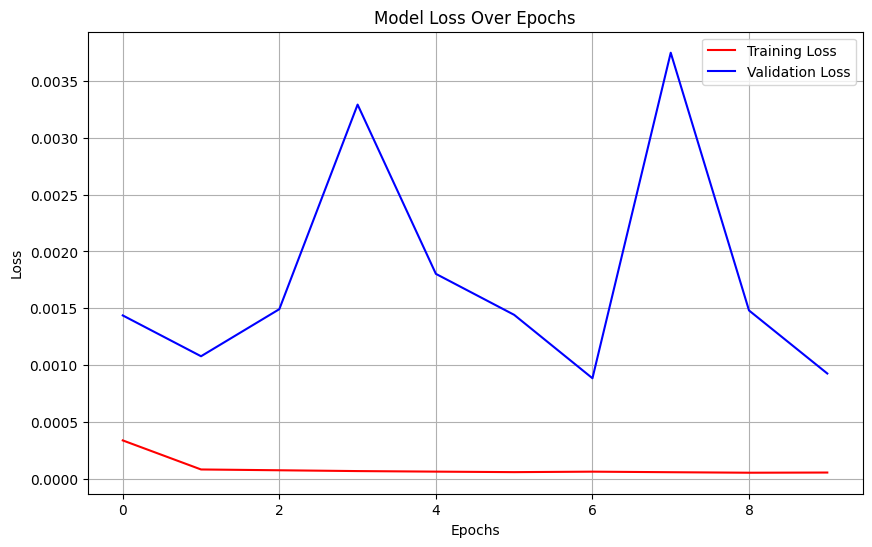

In [115]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
# Predict on the test data
predicted_stock_price = model.predict(X_test)
predicted_stock_price

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[0.40783173],
       [0.40982527],
       [0.41230574],
       ...,
       [0.5425881 ],
       [0.54568994],
       [0.54919356]], dtype=float32)

In [117]:
# Inverse transform the predicted and actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_actual

array([[ 78.630997],
       [ 78.306503],
       [ 79.112999],
       ...,
       [102.410004],
       [103.949997],
       [101.099998]])

In [118]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_stock_price))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 5.673135725856724


### Visualize the Plot Actual vs Predicted Stock Price

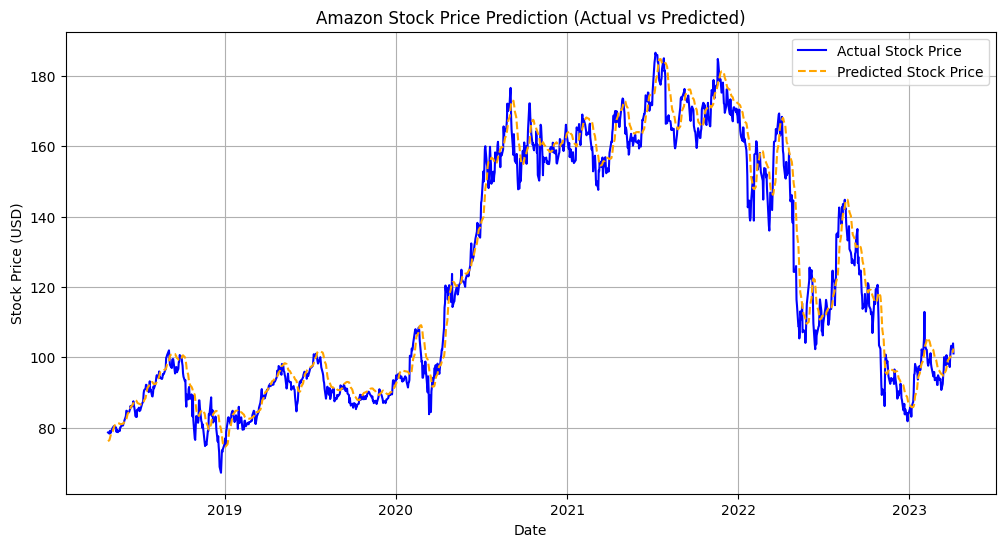

In [119]:
# Plot Actual vs Predicted Stock Price
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual Stock Price', color='blue')
plt.plot(data.index[-len(y_test_actual):], predicted_stock_price, label='Predicted Stock Price', color='orange', linestyle='--')
plt.title('Amazon Stock Price Prediction (Actual vs Predicted)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Visualize the Actual Stock Price, Training Data and Testing Data

In [120]:
train_size = int(len(amazon) * 0.8)
train_data = amazon[:train_size]
test_data = amazon[train_size:]

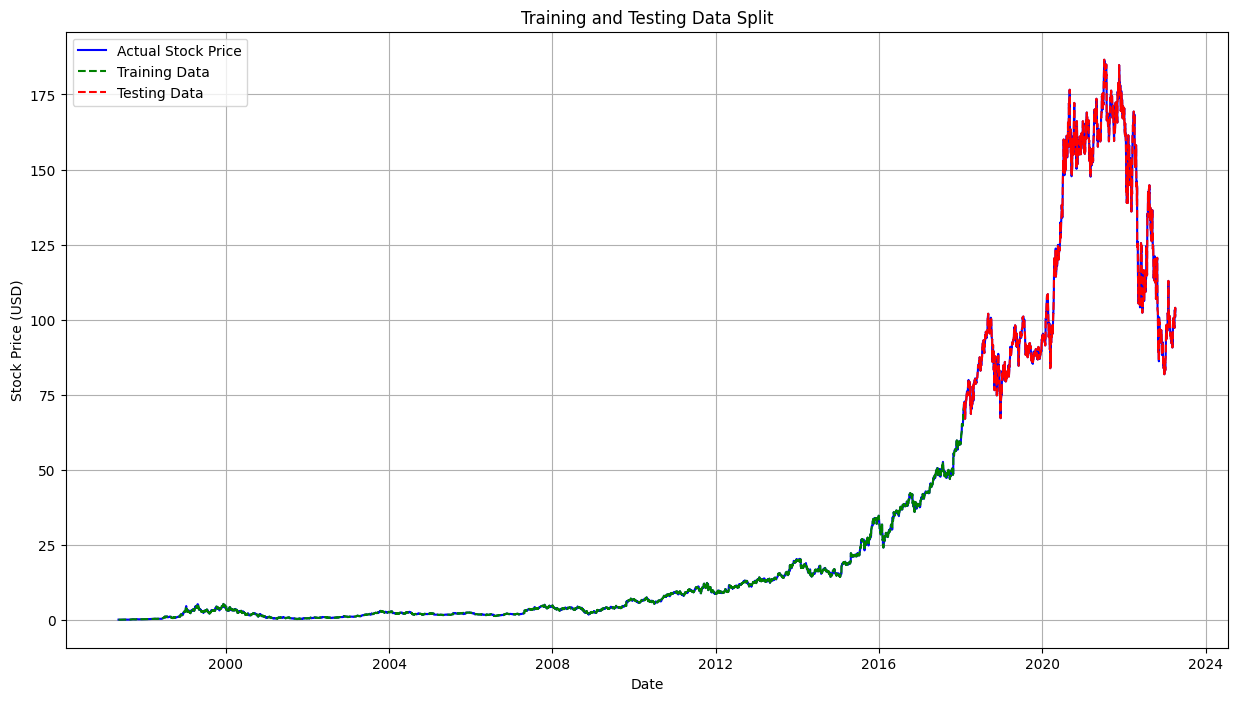

In [121]:
# Plot train and test data
plt.figure(figsize=(15, 8))
plt.plot(amazon['Date'], amazon['Close'], label='Actual Stock Price', color='blue')
plt.plot(train_data['Date'], train_data['Close'], label='Training Data', color='green', linestyle='--')
plt.plot(test_data['Date'], test_data['Close'], label='Testing Data', color='red', linestyle='--')
plt.title('Training and Testing Data Split')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## AMAZON STOCK PRICE WAVE GRAPH

## TRAIN TEST SPLIT

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x = amazon.drop(columns=['Close','MA50','MA200','Return','year','month','day','Date'],axis=1)
x

,Open,High,Low,Volume
0,0.121875,0.125000,0.096354,1443120000
1,0.098438,0.098958,0.085417,294000000
2,0.088021,0.088542,0.081250,122136000
3,0.086458,0.087500,0.081771,109344000
4,0.081771,0.082292,0.068750,377064000
...,...,...,...,...
6511,101.550003,103.040001,101.010002,53633400
6512,102.160004,103.489998,101.949997,56704300
6513,102.300003,103.290001,101.430000,41135700
6514,102.750000,104.199997,102.110001,48662500


In [124]:
y = amazon['Close']
y

0         0.097917
1         0.086458
2         0.085417
3         0.081771
4         0.071354
           ...    
6511    102.000000
6512    103.290001
6513    102.410004
6514    103.949997
6515    101.099998
Name: Close, Length: 6516, dtype: float64

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [126]:
print(x_train.shape, x_test.shape)

(5212, 4) (1304, 4)


In [127]:
x_train.isnull().sum()

Open      0
High      0
Low       0
Volume    0
dtype: int64

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lr = LinearRegression()

lr.fit( x_train, y_train)

LinearRegression()

In [130]:
print(lr.coef_)
print(lr.intercept_)

[-6.51290300e-01  8.46258951e-01  8.04918595e-01 -2.36092257e-11]
0.011352938086321984


In [131]:
predicted = lr.predict(x_test)
print(x_test)
print(predicted)

            Open        High         Low     Volume
5934  154.832993  155.933502  153.641006   61294000
1872    1.700000    1.720500    1.686000  210636000
1002    0.868000    0.876500    0.825500  101674000
6038  159.273499  160.192001  156.649994   67018000
6225  156.750504  161.792496  155.550507   76040000
...          ...         ...         ...        ...
4561   21.967501   22.000000   21.778999   39742000
4152   17.370001   17.811001   17.284000   55466000
3964   13.381500   13.446000   13.155500   79598000
1844    2.102500    2.159000    2.093500  222716000
5576  101.070000  101.144997  100.077499   59626000

[1304 rows x 4 columns]
[154.7973039    1.71226775   0.84983878 ...  13.26213697   2.14892708
 100.33313355]


In [132]:
predicted.shape

(1304,)

In [133]:
df1 = pd.DataFrame({"Actual": y_test, "Predicted": predicted})
print(df1)

          Actual   Predicted
5934  155.820999  154.797304
1872    1.698500    1.712268
1002    0.846000    0.849839
6038  158.073502  157.930894
6225  161.413498  160.043318
...          ...         ...
4561   21.869499   21.851213
4152   17.811001   17.682062
3964   13.254500   13.262137
1844    2.110500    2.148927
5576  101.049500  100.333134

[1304 rows x 2 columns]


In [134]:
lr.score( x_test, y_test)*100

99.9925851829221

In [135]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [136]:
print("Mean Absolute Error", metrics.mean_absolute_error( y_test, predicted))
print("Mean Sqaure Error", metrics.mean_squared_error( y_test, predicted))
print("Root Mean Error", metrics.root_mean_squared_error( y_test, predicted))

Mean Absolute Error 0.17046239649768852
Mean Sqaure Error 0.16719652856052383
Root Mean Error 0.40889672114181086


In [137]:
predicted = lr.predict(x)
print(predicted)

[8.12454822e-02 9.27979361e-02 9.14712741e-02 ... 1.02436363e+02
 1.03460544e+02 1.01365030e+02]


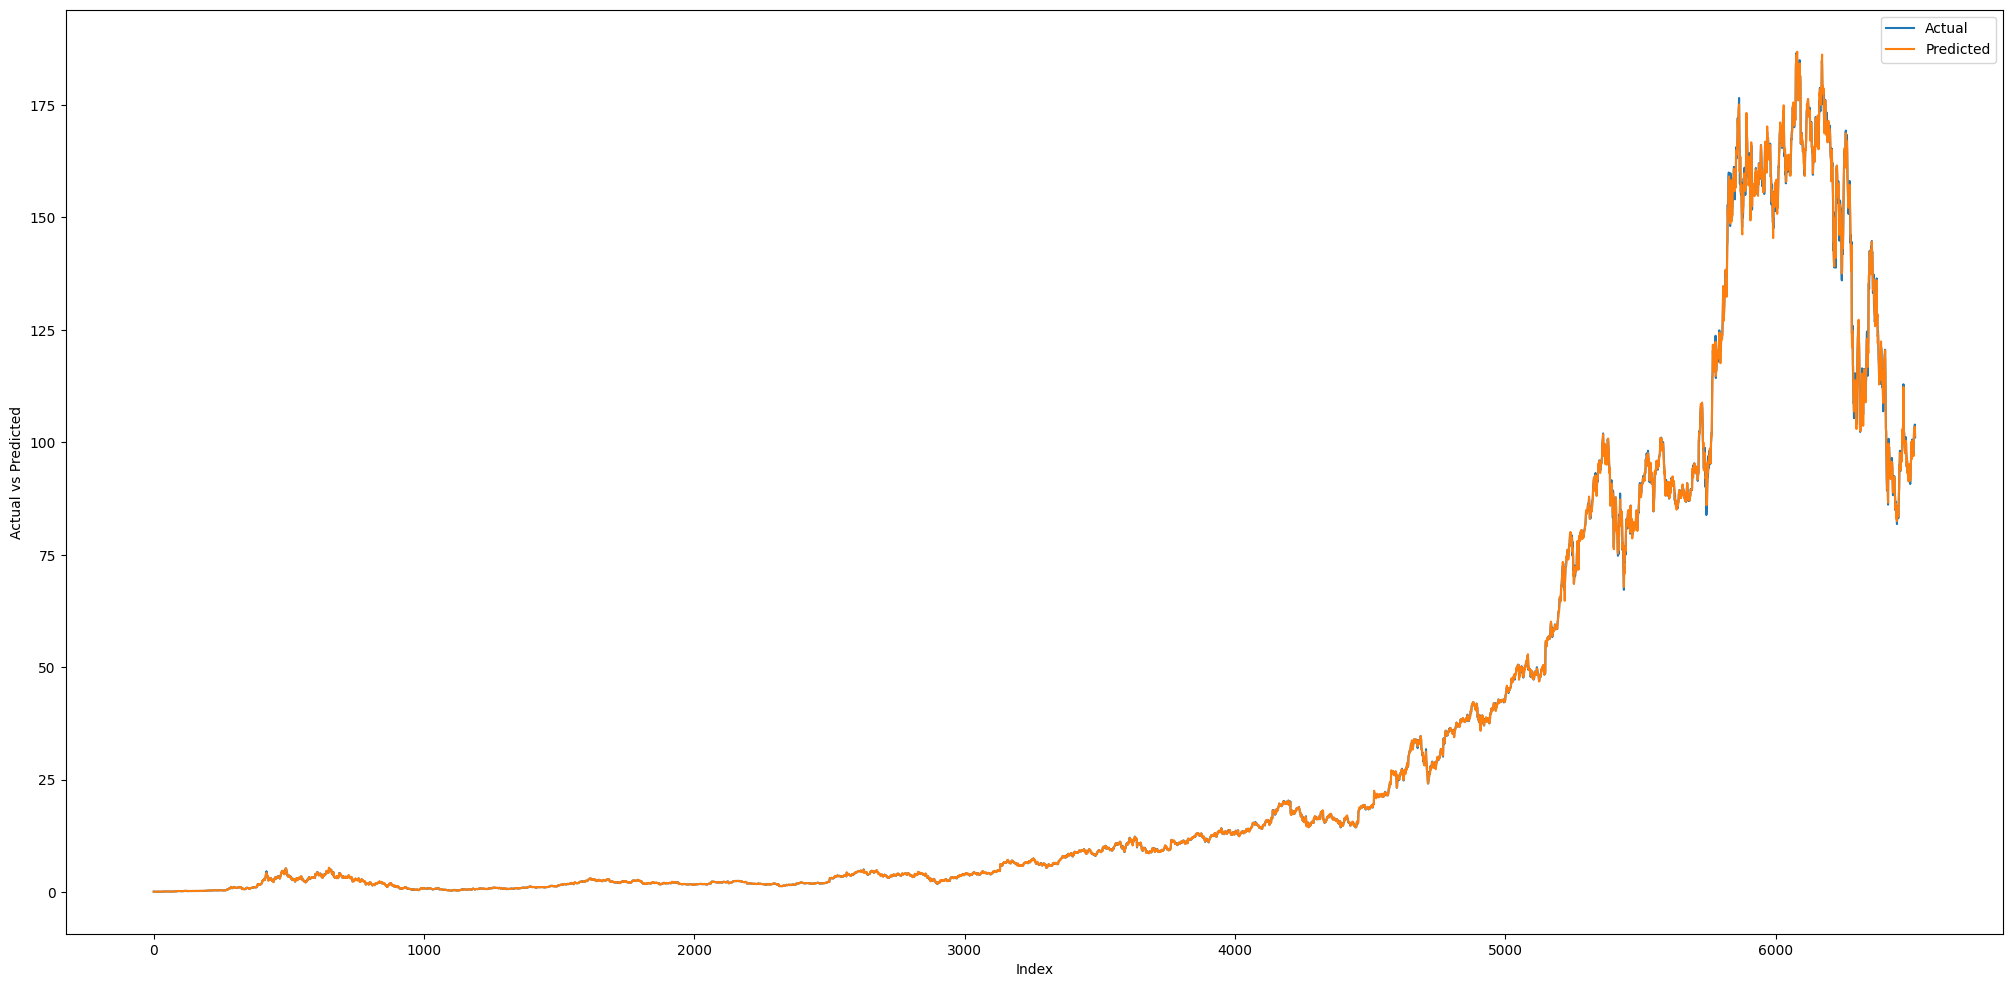

In [138]:
fig, ax = plt.subplots(figsize=(25,12))
plt.plot( y, label = "Actual")
plt.plot(predicted, label = "Predicted")
plt.xlabel("Index")
plt.ylabel("Actual vs Predicted")
plt.legend()
plt.show()